In [ ]:
from sklearn.datasets import make_classification
import pandas as pd

# Create a simple binary classification dataset
X, y = make_classification(
    n_samples=20,       # only 20 data points
    n_features=2,       # 2 input features (easy to visualize)
    n_informative=2,
    n_redundant=0,
    random_state=42
)

# Convert to DataFrame for clarity
data = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
data['Target'] = y
print(data)

    Feature1  Feature2  Target
0  -0.282806 -1.408761       0
1   0.947029  0.559068       0
2   1.157722  0.474995       0
3   1.995915  0.772821       1
4   0.040500  1.397327       1
5   1.470444 -0.860551       0
6  -0.707435  0.892172       1
7  -1.456943 -0.045648       1
8   0.622035  2.367495       0
9  -0.015444  1.092585       1
10  1.611252 -0.656781       0
11  1.454542  0.913547       1
12 -0.207148  1.330555       1
13  1.963233 -0.769720       0
14 -0.964007 -0.829901       0
15  2.075692  0.660096       1
16 -0.655035 -0.835856       0
17 -1.425716 -1.313734       0
18 -0.874968 -0.113507       1
19  1.255794 -0.372050       0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt


# Main structure:
# dt = DecisionTreeClassifier(
#     criterion='gini',      # or 'entropy'
#     max_depth=None,
#     min_samples_split=2,
#     min_samples_leaf=1,
#     max_features=None,
#     random_state=42
# )

# Tree 1: Fully grown (no limits)
# Without "min_samples_leaf" parameter, it will be 1 datapoint as a default, more liley to overfit
dt1 = DecisionTreeClassifier(max_depth=None, random_state=42)
dt1.fit(X, y)

# Tree 2: Shallow tree (limit depth)
dt2 = DecisionTreeClassifier(max_depth=2, random_state=42)
dt2.fit(X, y)

# Tree 3: Control leaf size
# This means it controls how many datapoints it can reach before going the next depth.
dt3 = DecisionTreeClassifier(max_depth=None, min_samples_leaf=4, random_state=42)
dt3.fit(X, y)


DecisionTreeClassifier(min_samples_leaf=4, random_state=42)

In [5]:
print("Tree depth:", dt1.get_depth())
print("Number of leaves:", dt1.get_n_leaves())

Tree depth: 3
Number of leaves: 4


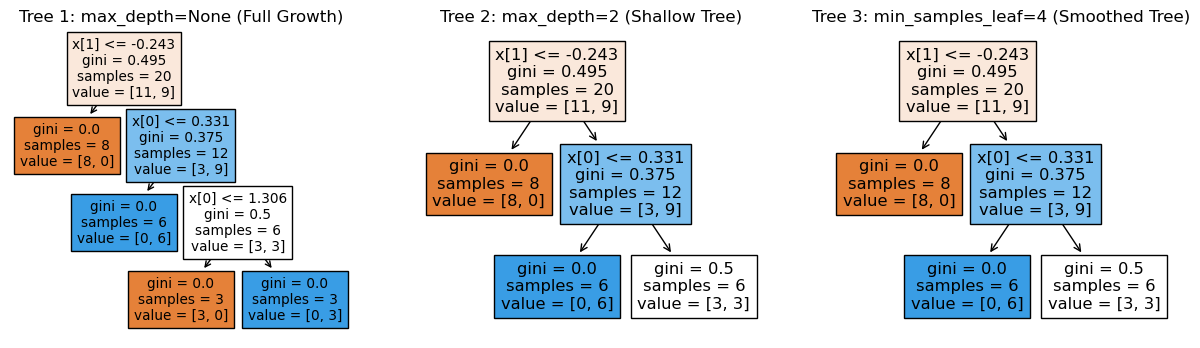

In [4]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
tree.plot_tree(dt1, filled=True)
plt.title("Tree 1: max_depth=None (Full Growth)")

plt.subplot(1, 3, 2)
tree.plot_tree(dt2, filled=True)
plt.title("Tree 2: max_depth=2 (Shallow Tree)")

plt.subplot(1, 3, 3)
tree.plot_tree(dt3, filled=True)
plt.title("Tree 3: min_samples_leaf=4 (Smoothed Tree)")

plt.show()


✅ Best Parameters Found:
{'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}

🏆 Best Cross-Validation Accuracy: 0.9

🧩 Test Accuracy: 0.95

📊 Grid Search Summary:
     mean_test_score param_max_depth param_min_samples_split param_criterion
146              0.9               3                      10         entropy
145              0.9               3                       5         entropy
156              0.9               3                       2         entropy
155              0.9               3                      10         entropy
154              0.9               3                       5         entropy
153              0.9               3                       2         entropy
149              0.9               3                      10         entropy
148              0.9               3                       5         entropy
147              0.9               3                       2         entropy
158    

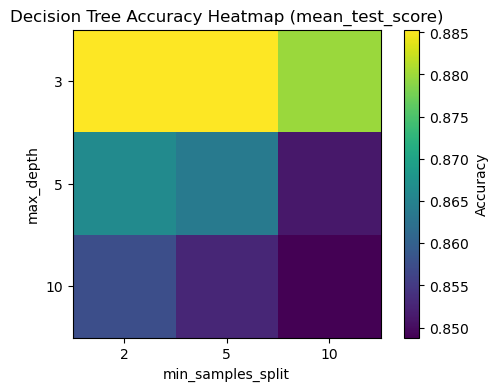

In [6]:
# === 1️⃣ Import Libraries ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# === 2️⃣ Create Simple Dataset ===
X, y = make_classification(
    n_samples=200,
    n_features=4,
    n_informative=3,
    n_redundant=0,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# === 3️⃣ Define Model ===
dt = DecisionTreeClassifier(random_state=42)

# === 4️⃣ Define Parameter Grid ===
param_grid = {
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# === 5️⃣ Set Up Grid Search ===
grid = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,                # 5-fold cross-validation
    scoring='accuracy',  # Measure model performance by accuracy
    n_jobs=-1            # Use all CPU cores for speed
)

# === 6️⃣ Run Grid Search ===
grid.fit(X_train, y_train)

# === 7️⃣ Show Best Results ===
print("✅ Best Parameters Found:")
print(grid.best_params_)
print("\n🏆 Best Cross-Validation Accuracy:", round(grid.best_score_, 3))

# === 8️⃣ Evaluate on Test Set ===
best_dt = grid.best_estimator_
y_pred = best_dt.predict(X_test)
print("\n🧩 Test Accuracy:", round(accuracy_score(y_test, y_pred), 3))

# === 9️⃣ Convert Results to DataFrame for Visualization ===
results_df = pd.DataFrame(grid.cv_results_)

# Show only a few useful columns
cols = ['mean_test_score', 'param_max_depth', 'param_min_samples_split', 'param_criterion']
print("\n📊 Grid Search Summary:")
print(results_df[cols].sort_values(by='mean_test_score', ascending=False).head(10))

# === 🔟 Optional: Visualize performance by max_depth ===
pivot = results_df.pivot_table(
    values='mean_test_score',
    index='param_max_depth',
    columns='param_min_samples_split'
)

plt.figure(figsize=(6, 4))
plt.title("Decision Tree Accuracy Heatmap (mean_test_score)")
plt.imshow(pivot, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Accuracy')
plt.xticks(range(len(pivot.columns)), pivot.columns)
plt.yticks(range(len(pivot.index)), pivot.index)
plt.xlabel('min_samples_split')
plt.ylabel('max_depth')
plt.show()


In [7]:
# === 1) Imports ===
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# === 2) Toy dataset (binary classification) ===
X, y = make_classification(
    n_samples=600,
    n_features=12,
    n_informative=6,
    n_redundant=2,
    random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# === 3) Base model ===
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# === 4) Param grid (balanced for speed vs quality) ===
param_grid = {
    "n_estimators": [100, 200],          # more trees = stabler but slower
    "max_depth": [None, 6, 10],          # None lets trees grow until stopping rules
    "min_samples_split": [2, 5, 10],     # higher -> simpler trees
    "min_samples_leaf": [1, 2, 4],       # higher -> smoother leaves
    "max_features": ["sqrt", "log2"],    # RF-style feature subsampling
    "bootstrap": [True],                 # classic RF bootstrapping
    "criterion": ["gini", "entropy"],    # split quality measure
}

# === 5) Grid search ===
grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                   # 5-fold CV
    scoring="accuracy",     # change to "roc_auc" for probs on binary tasks
    n_jobs=-1,
    verbose=0
)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("CV best score:", round(grid.best_score_, 3))

# === 6) Evaluate on held-out test set ===
best_rf = grid.best_estimator_
y_pred = best_rf.predict(X_test)
print("Test accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nClassification report:\n", classification_report(y_test, y_pred))

# === 7) (Optional) Feature importance peek ===
importances = pd.Series(best_rf.feature_importances_).sort_values(ascending=False)
print("\nTop 10 feature importances:\n", importances.head(10))


Best params: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
CV best score: 0.9
Test accuracy: 0.887

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89        74
           1       0.90      0.87      0.89        76

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.89      0.89      0.89       150


Top 10 feature importances:
 0     0.289618
5     0.144855
8     0.093330
9     0.086664
1     0.085568
2     0.064588
11    0.062783
6     0.057606
3     0.030886
7     0.029185
dtype: float64


## All 4 models

ValueError: 
All the 50 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\naive_bayes.py", line 776, in fit
    self._count(X, Y)
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\naive_bayes.py", line 898, in _count
    check_non_negative(X, "MultinomialNB (input X)")
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1418, in check_non_negative
    raise ValueError("Negative values in data passed to %s" % whom)
ValueError: Negative values in data passed to MultinomialNB (input X)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# === 1️⃣ Create a sample mixed dataset ===
data = pd.DataFrame({
    "Height_cm": [180, 165, np.nan, 172, 158],
    "Weight_kg": [75, 60, 90, np.nan, 55],
    "Gender": ["Male", "Female", "Female", "Male", "Female"],
    "Smoker": ["No", "Yes", "No", "No", np.nan]
})

print("=== Raw Data ===")
print(data)

# === 2️⃣ Split numeric and categorical columns ===
numeric_features = ["Height_cm", "Weight_kg"]
categorical_features = ["Gender", "Smoker"]

# === 3️⃣ Define preprocessing steps ===

# Numeric: fill missing values with mean, then scale
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

# Categorical: fill missing with "missing", then one-hot encode
categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# === 4️⃣ Combine both into a ColumnTransformer ===
preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

# === 5️⃣ Fit + transform the data ===
processed = preprocessor.fit_transform(data)

# Convert back to readable DataFrame (for demo)
cat_columns = preprocessor.named_transformers_["cat"]["encoder"].get_feature_names_out(categorical_features)
processed_df = pd.DataFrame(processed, columns=list(numeric_features) + list(cat_columns))

print("\n=== Preprocessed Data ===")
print(processed_df.round(2))

=== Raw Data ===
   Height_cm  Weight_kg  Gender Smoker
0      180.0       75.0    Male     No
1      165.0       60.0  Female    Yes
2        NaN       90.0  Female     No
3      172.0        NaN    Male     No
4      158.0       55.0  Female    NaN

=== Preprocessed Data ===
   Height_cm  Weight_kg  Gender_Female  Gender_Male  Smoker_No  Smoker_Yes
0       1.54       0.41            0.0          1.0        1.0         0.0
1      -0.51      -0.82            1.0          0.0        0.0         1.0
2       0.00       1.63            1.0          0.0        1.0         0.0
3       0.44       0.00            0.0          1.0        1.0         0.0
4      -1.47      -1.22            1.0          0.0        1.0         0.0
